## Data Exploration    
First let's investigate the experiment data we have.

In [2]:
import pandas as pd
import numpy as np

experimentDf = pd.read_csv('../experiment.csv')
experimentDf.head()

FileNotFoundError: [Errno 2] No such file or directory: '../experiment.csv'

In [2]:
clearedExperimentDf = experimentDf.drop(columns='agent')
clearedExperimentDf

,id,univ,gender,age,mother,recordingsI,recordingsII
0,1,EVALUATOR,f,32.0,chinese,4.0,4.0
1,2,test,f,33.0,Chinese,12.0,6.0
2,3,EVALUATOR,f,33.0,Chinese,3.0,7.0
3,4,test,f,33.0,Chinese,2.0,6.0
4,8,PG_CS_MA_1,m,25.0,polish,12.0,12.0
...,...,...,...,...,...,...,...
874,1540,CLES_UMK5,NaN,NaN,NaN,NaN,NaN
875,1541,CLES_UMK5,NaN,NaN,NaN,NaN,NaN
876,1542,CLES_UMK5,m,26.0,polish,11.0,18.0
877,1543,CLES_UMK5,f,27.0,Polish,12.0,15.0


In [3]:
nullRowsDf = clearedExperimentDf[clearedExperimentDf.isnull().any(axis=1)]
nullRowsDf

,id,univ,gender,age,mother,recordingsI,recordingsII
9,22,PG_CS_MA_1,m,24.0,polish,12.0,NaN
37,114,PG_CS_MA_1,m,23.0,polish,9.0,NaN
50,145,PSSO_2021,NaN,NaN,NaN,NaN,NaN
51,146,PSSO_2021,NaN,NaN,NaN,NaN,NaN
54,150,PSSO_2021,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,1525,CLES_UMK5,NaN,NaN,NaN,NaN,NaN
870,1536,CLES_UMK5,m,26.0,polish,12.0,NaN
872,1538,CLES_UMK5,NaN,NaN,NaN,NaN,NaN
874,1540,CLES_UMK5,NaN,NaN,NaN,NaN,NaN


Okay so there are 370 rows with some kind of NULL values. I think it's acceptable to not have the demographic information for an experimental object (row in our case) as long as we have some (not null) recordings for them. I am going to remove only the rows that don't have any recordings.

In [4]:
filteredExperimentDf = clearedExperimentDf[~(clearedExperimentDf['recordingsI'].isnull() & clearedExperimentDf['recordingsII'].isnull())]
filteredExperimentDf

,id,univ,gender,age,mother,recordingsI,recordingsII
0,1,EVALUATOR,f,32.0,chinese,4.0,4.0
1,2,test,f,33.0,Chinese,12.0,6.0
2,3,EVALUATOR,f,33.0,Chinese,3.0,7.0
3,4,test,f,33.0,Chinese,2.0,6.0
4,8,PG_CS_MA_1,m,25.0,polish,12.0,12.0
...,...,...,...,...,...,...,...
871,1537,CLES_UMK5,f,23.0,polish,12.0,14.0
873,1539,CLES_UMK5,m,23.0,Polish,12.0,18.0
876,1542,CLES_UMK5,m,26.0,polish,11.0,18.0
877,1543,CLES_UMK5,f,27.0,Polish,12.0,15.0


Okay that leaves us with 599 people who tried to speak mandarin and were recorded.

## Data Exploration:  Tones with labels

In [5]:
tonesDf = pd.read_excel('../tones_with_label.xls')
tonesDf[8:18]

,word,tone
8,a8t,1
9,a9t,3
10,a10t,2
11,a100t,3
12,q1t1,4
13,q1t2,3
14,q1t3,1
15,q2t,1
16,q3t,2
17,q4t1,1


Okay so words like 'a8t' have only one tone and words like: 'q1t1, q1t2, q1t3' consist of multiple tones. There are 40 different tones and less words.

In [6]:
np.shape(tonesDf)

(40, 2)

# Data Exploration: Assesment

In [3]:
import pandas as pd 
assesmentDf = pd.read_csv('../../../assesment.csv')
assesmentDf

,id_evaluator,id_student,a0p,a1p,a2p,a3p,a4p,a5p,a6p,a7p,...,q14t1,q14t2,q15t1,q15t2,q16t1,q16t2,q17t1,q17t2,q18t1,q18t2
0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,8,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,9,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0
4,1,10,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,2.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,3,694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,3,696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
623,3,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624,3,698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
assesmentCleanDf = assesmentDf.drop(columns='id_evaluator')
assesmentCleanDf = assesmentCleanDf[assesmentCleanDf.drop(columns='id_student').notnull().any(axis=1)]
assesmentCleanDf = assesmentCleanDf.drop(columns=[col for col in assesmentCleanDf.columns if col.startswith('q')])
assesmentCleanDf

,id_student,a0p,a1p,a2p,a3p,a4p,a5p,a6p,a7p,a8p,...,a2t,a3t,a4t,a5t,a6t,a7t,a8t,a9t,a10t,a100t
2,8,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,0.0
3,9,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,4.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0
4,10,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0,3.0
5,11,1.0,NaN,0.0,NaN,1.0,1.0,NaN,0.0,1.0,...,4.0,NaN,1.0,3.0,NaN,2.0,1.0,2.0,NaN,0.0
6,21,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,1537,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0
593,1539,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,4.0,4.0,4.0,0.0,4.0,1.0,4.0,4.0,4.0,0.0
594,1542,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,...,4.0,4.0,4.0,2.0,0.0,4.0,NaN,0.0,4.0,2.0
595,1543,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0


There are 569 people who were evaluated for at least some recordings. There is a difference between the people who have recorded themselves and the ones who were evaluated, but this could simply be because some of them weren't evaluated. CHECK IF THIS IS TRUE?

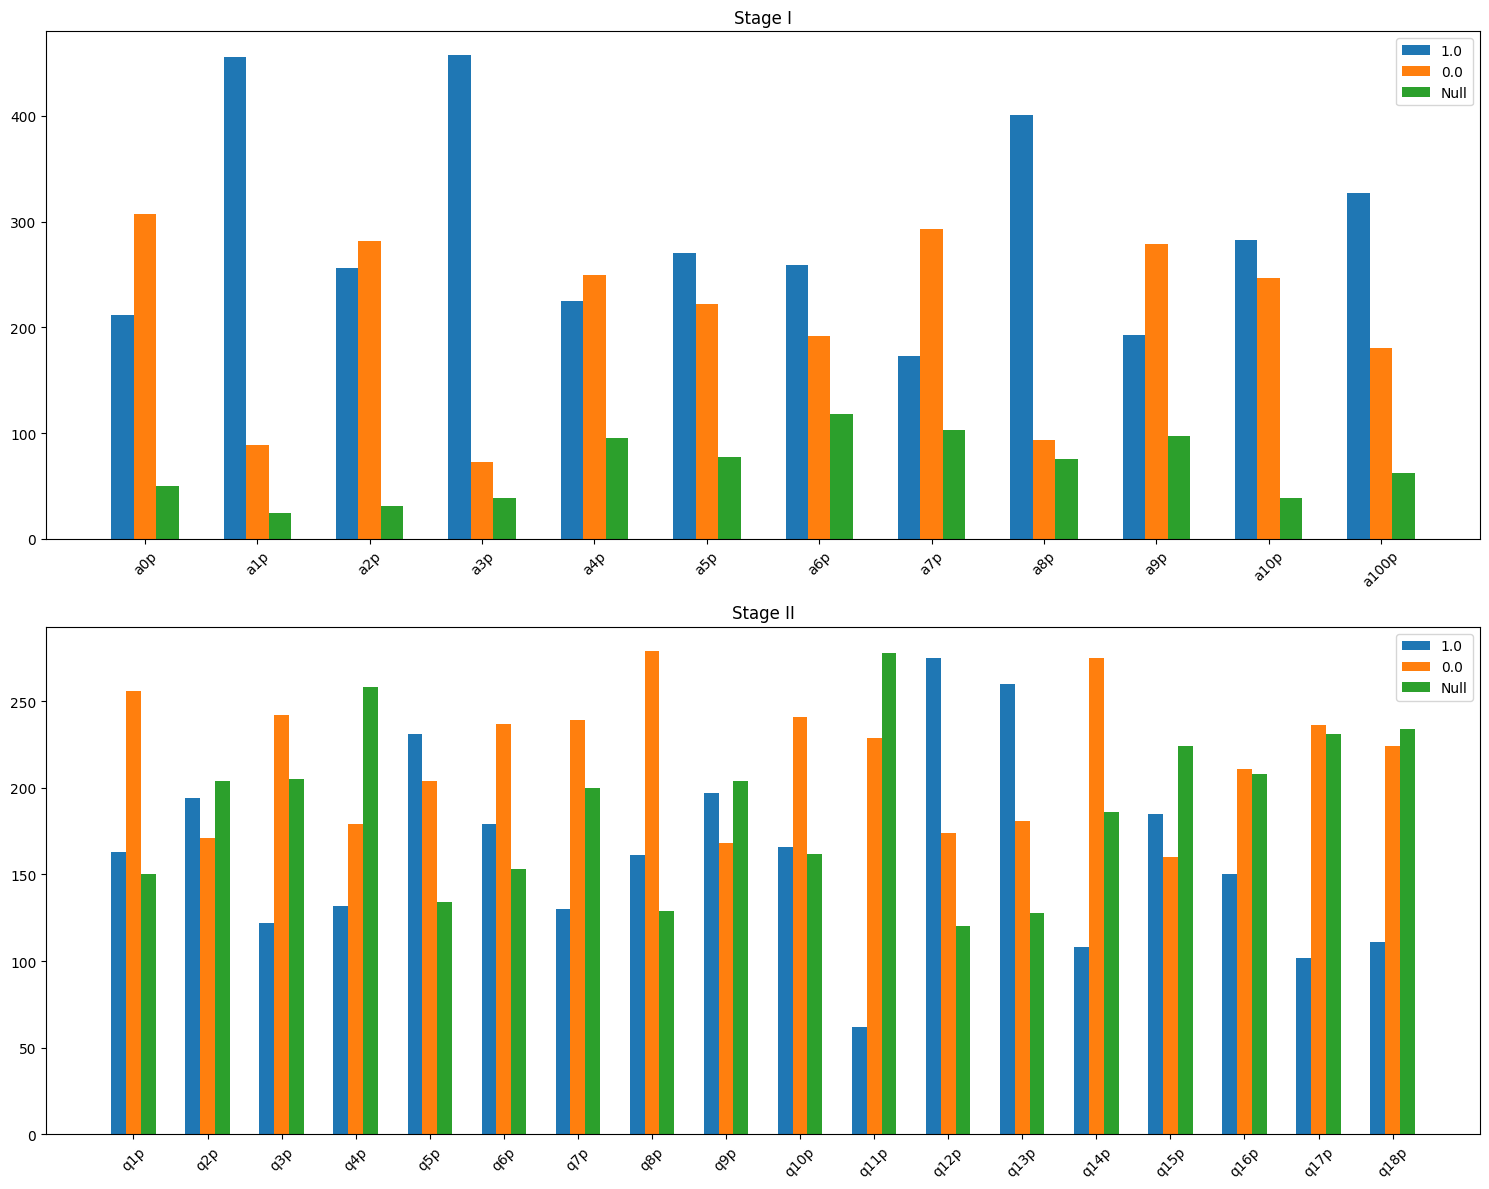

In [9]:
from collections import defaultdict
import re

import matplotlib.pyplot as plt

# Select columns ending with 'p'
p_columns = [col for col in assesmentCleanDf.columns if col.endswith('p') and col != 'id_student']

# Group columns by their prefix letter (e.g., 'a', 'q')

letter_groups = defaultdict(list)
for col in p_columns:
    match = re.match(r'([a-zA-Z]+)', col)
    if match:
        letter_groups[match.group(1)].append(col)

# Prepare data for each letter group
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
axes = axes.flatten()

for idx, (letter, cols) in enumerate(sorted(letter_groups.items())[:6]):
    counts_1 = []
    counts_0 = []
    counts_null = []
    for col in cols:
        counts_1.append((assesmentCleanDf[col] == 1.0).sum())
        counts_0.append((assesmentCleanDf[col] == 0.0).sum())
        counts_null.append(assesmentCleanDf[col].isnull().sum())
    x = range(len(cols))
    axes[idx].bar([i - 0.2 for i in x], counts_1, width=0.2, label='1.0')
    axes[idx].bar(x, counts_0, width=0.2, label='0.0')
    axes[idx].bar([i + 0.2 for i in x], counts_null, width=0.2, label='Null')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(cols, rotation=45)
    axes[idx].set_title(f"Stage {'I' if letter == 'a' else 'II'}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

The first stage of the experiment was about pronouncing simple words which were numbers from 0 to 10 and one number: 100. The numbers that are standing out the most are 1, 3, 8 and maybe 100 as the ones that were pronounced correctly the most times. Other numbers have a similiar proportion of correct, incorrect and NULLs compared to other numbers besides 1, 3, 8, 100.                                     
                    
For the second stage there were words that were harder to pronounce and had more tones. The most correctly pronounced words were q12 and q13, with around 250 occurrences. Another worth mentioning observation is that q11 and q4 had the most NULLs so no recordings. The prove that the words were generally harder to pronounce can be seen by the count of wrong pronounciation which is high for almost every word.

## Data Exploration: Sample recording

In [10]:
import ffmpeg

input_path = r'C:/Users/fisch/Documents/studiaMagisterskie/sem1/zespolowyProjektBadawczy/recordings/stageI/25/a10.ogg'
output_path = r'C:/Users/fisch/Documents/studiaMagisterskie/sem1/zespolowyProjektBadawczy/recordings/stageI/25/a10.wav'

(
    ffmpeg
    .input(input_path)
    .output(output_path, ar=16000, ac=1)  # 16kHz, mono
    .run(overwrite_output=True)
)

(None, None)

In [11]:
from pydub import AudioSegment
import numpy as np
import librosa

# Load and convert to raw audio
audio = AudioSegment.from_file("../recordings/stageI/25/a10.wav", format='wav')
samples = np.array(audio.get_array_of_samples()).astype(np.float32) / (2**15)
sr = audio.frame_rate


# Resample if needed
if sr != 16000:
    samples = librosa.resample(samples, orig_sr=sr, target_sr=16000)
    sr = 16000


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio
y, sr = librosa.load("../recordings/stageI/25/a10.wav", sr=16000)


In [ ]:

# Mel-spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

In [ ]:
# Pitch contour (F0)
f0, voiced_flag, voiced_probs = librosa.pyin(
    y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7')
)

# Plot Mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel-Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Plot Pitch contour
plt.figure(figsize=(10, 2))
plt.plot(f0, label='F0')
plt.title('Pitch Contour')
plt.xlabel('Frame')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()# Pitch contour (F0)
f0, voiced_flag, voiced_probs = librosa.pyin(
    y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7')
)

# Plot Mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel-Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Plot Pitch contour
plt.figure(figsize=(10, 2))
plt.plot(f0, label='F0')
plt.title('Pitch Contour')
plt.xlabel('Frame')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()